***TechNova Sales Insights***

**Case Study 1 [Exploratory Data Analysis]**

**Details regarding the data:-**

**Transactional Data:** This table contains details of each and every transaction that happens across any TechNova store across India or via Online channels. Product Returns are also captured as transactions. Details of the SKU, product category, price, store location or online channel, Customer ID, etc. are available in this table.

In [1]:
# Importing Essential libraries to work on dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading CSV file into DataFrame 
df = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/wetransfer_campaign_data-csv_2024-04-13_0433/Customer_Transaction_Data.csv")

In [3]:
# Checking for the Columns, Count and Data-types in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625393 entries, 0 to 1625392
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CustID                    1625393 non-null  object 
 1   ItemDesc                  1615527 non-null  object 
 2   MerchCategoryDescription  1615527 non-null  object 
 3   MerchClassDescription     1613558 non-null  object 
 4   MerchGroupDescription     1613558 non-null  object 
 5   SaleValue                 1625384 non-null  float64
 6   OrderedQuantity           1625393 non-null  int64  
 7   OrderDate                 1625393 non-null  object 
 8   ReturnFlag                77239 non-null    object 
 9   SalesChannelCode          1625393 non-null  object 
 10  Ecom_BnM_Indicator        1625393 non-null  object 
 11  StoreID                   1625374 non-null  float64
 12  StoreCode                 1625390 non-null  object 
 13  StoreCity                 1

In [4]:
df.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,-25398.00,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,-193703.10,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.98,1,2019-01-01,NaN,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
3,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Wireless Earphones ITFIT Freebie Red,Wireless Earphones ITFIT Freebie Red,Free Gifts,Miscellaneous,0.00,1,2019-01-01,NaN,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
4,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,-1120.98,-1,2019-01-01,NaN,RS,B&M,8.0,A010,Surat,Gujarat,395007


In [5]:
# Getting the Number of NULL values in the dataset
df.isnull().sum()

CustID                            0
ItemDesc                       9866
MerchCategoryDescription       9866
MerchClassDescription         11835
MerchGroupDescription         11835
SaleValue                         9
OrderedQuantity                   0
OrderDate                         0
ReturnFlag                  1548154
SalesChannelCode                  0
Ecom_BnM_Indicator                0
StoreID                          19
StoreCode                         3
StoreCity                    125124
StoreState                   182927
StorePincode                 182927
dtype: int64

In [6]:
# Getting the percentage of NaN values
nan_percentiles = []
for col in df.columns:
    nan_percentage = df[col].isnull().mean() * 100
    nan_percentiles.append((col, nan_percentage))
    
nan_percentiles.sort(key=lambda x: x[1], reverse=True)

print("Percentile of NaN values in each column:")
for col, nan_percentage in nan_percentiles:
    print(f"{col}: {nan_percentage:.2f}%")

Percentile of NaN values in each column:
ReturnFlag: 95.25%
StoreState: 11.25%
StorePincode: 11.25%
StoreCity: 7.70%
MerchClassDescription: 0.73%
MerchGroupDescription: 0.73%
ItemDesc: 0.61%
MerchCategoryDescription: 0.61%
StoreID: 0.00%
SaleValue: 0.00%
StoreCode: 0.00%
CustID: 0.00%
OrderedQuantity: 0.00%
OrderDate: 0.00%
SalesChannelCode: 0.00%
Ecom_BnM_Indicator: 0.00%


**Now we will treat the columns with higher NaN percentile and also the columns with extremely lower NaN percentile.**

In [7]:
df.drop(columns=['ReturnFlag'], inplace=True)

Dropping the column "ReturnFlag" since the percentage of NaN values is 95.25% which is not useful for our analysis.

In [8]:
Merch_columns = ['MerchClassDescription', 'MerchGroupDescription', 'ItemDesc', 'MerchCategoryDescription']
df = df.dropna(subset=Merch_columns)

Dropped the NaN values from 'MerchClassDescription', 'MerchGroupDescription', 'ItemDesc', 'MerchCategoryDescription' because the percentage of NaN values is less then 3% (Standard Value)

In [9]:
# Treating NULL values in column 'StoreState'
for index, row in df.iterrows():
    # Checking if 'StoreState' is NaN
    if pd.isna(row['StoreState']):
        # Filling 'StoreState' with the value from 'StoreCity'
        df.at[index, 'StoreState'] = row['StoreCity']

# Checking if NaN values in 'StoreState' are filled
print("NaN values filled for 'StoreState' column:")
print(df['StoreState'].isnull().sum())

NaN values filled for 'StoreState' column:
113678


Firstly checking for NaN values in 'StoreState' and then filling the values from 'StoreCity' respected to 'StoreState'.

In [10]:
columns_to_replace = ['StoreCity', 'StoreState']

# Replacing blank spaces with 'DEFAULT' for the specified columns
df[columns_to_replace] = df[columns_to_replace].fillna('DEFAULT')

The above step will allow us to fill NaN values with the word 'DEFAULT' and by this way all NULL values will be treated correctly.

In [11]:
df[columns_to_replace].isnull().sum()

StoreCity     0
StoreState    0
dtype: int64

As we can see that there are no NaN values in 'StoreCity', 'StoreState'. Similarly applying same step to 'StorePincode' but instead of 'DEFAULT' we will be replacing it by '0' because the datatype of the column is numerical.

In [12]:
df['StorePincode'] = df['StorePincode'].fillna(0)

In [13]:
df['StorePincode'].isnull().sum()

0

In [14]:
nan_percentiles = []
for col in df.columns:
    nan_percentage = df[col].isnull().mean() * 100
    nan_percentiles.append((col, nan_percentage))
    
nan_percentiles.sort(key=lambda x: x[1], reverse=True)

print("Percentile of NaN values in each column:")
for col, nan_percentage in nan_percentiles:
    print(f"{col}: {nan_percentage:.2f}%")

Percentile of NaN values in each column:
StoreID: 0.00%
SaleValue: 0.00%
StoreCode: 0.00%
CustID: 0.00%
ItemDesc: 0.00%
MerchCategoryDescription: 0.00%
MerchClassDescription: 0.00%
MerchGroupDescription: 0.00%
OrderedQuantity: 0.00%
OrderDate: 0.00%
SalesChannelCode: 0.00%
Ecom_BnM_Indicator: 0.00%
StoreCity: 0.00%
StoreState: 0.00%
StorePincode: 0.00%


**From the above step it is clear that there are NO NULL values in our dataset**

**Now lets check the Skewness of the Numerical columns drom the above dataframe**

In [15]:
SaleValue_skew = df['SaleValue'].skew()
OrderedQuantity_skew = df['OrderedQuantity'].skew()

From all the numerical columns we have selected the 'SaleValue' & 'OrderedQuantity' because this are the most relevant columns in our dataframe.

In [16]:
print(SaleValue_skew)
print(OrderedQuantity_skew)

2.144620322742717
616.5358470146809


As we can see that the skewness of 'SaleValue' is 2.145 and that of 'OrderedQuantity' is 616.54 which is highly skewed. 

**Now Visualizing the skewness of 'SaleValue' & 'OrderedQuantity' with the help of KDE plot**

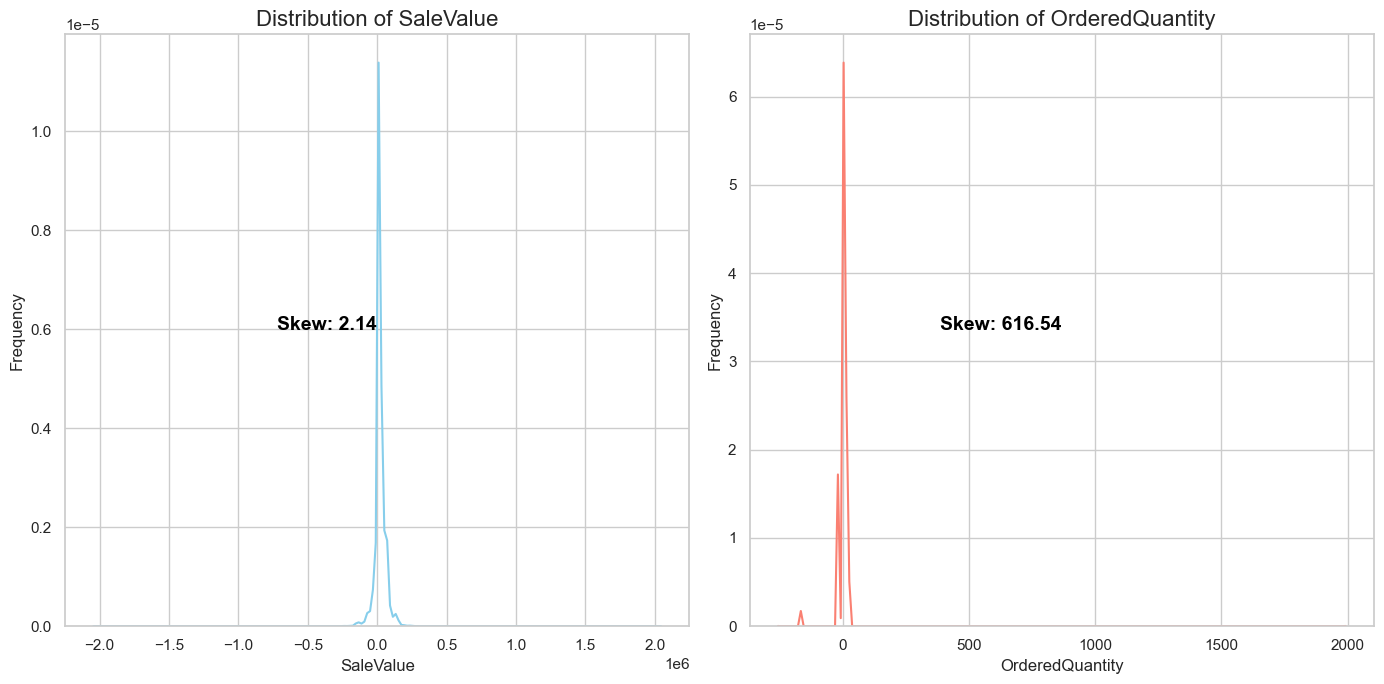

In [17]:
# Setting the style of seaborn
sns.set(style='whitegrid')
 
# Creating a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
 
# Plot for SaleValue
sns.kdeplot(df['SaleValue'], ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of SaleValue', fontsize=16)
ax[0].set_xlabel('SaleValue')
ax[0].set_ylabel('Frequency')
# Annotating Skewness
ax[0].text(0.5, 0.5, f'Skew: {SaleValue_skew:.2f}', transform=ax[0].transAxes,horizontalalignment='right', 
           color='black', weight='bold',fontsize=14)
 
# Plot for OrderedQuantity
sns.kdeplot(df['OrderedQuantity'], ax=ax[1], color='salmon')
ax[1].set_title('Distribution of OrderedQuantity', fontsize=16)
ax[1].set_xlabel('OrderedQuantity')
ax[1].set_ylabel('Frequency')
# Annotating Skewness
ax[1].text(0.5, 0.5, f'Skew: {OrderedQuantity_skew:.2f}', transform=ax[1].transAxes,horizontalalignment='right', 
           color='black', weight='bold',fontsize=14)
 
plt.tight_layout()
plt.show()

In [18]:
df['SaleValue'] = df['SaleValue'].abs()
df['OrderedQuantity'] = df['OrderedQuantity'].abs()

Since there are -ve values in the above columns so we used **abs()** function which will convert all -ve values to +ve values so that we can perform Log Transformation or Square Root Transformation 

In [19]:
# Checking for all Unique values
df['OrderedQuantity'].unique()

array([   1,   15,    2,   10,    5,    3,    4,    0,   17,    6,    9,
         21,   18,  100,    8,   25,   12,   16,   20,  221,   50,   19,
         45,   24,    7,  152,  150,   11,   30,   13,   68,   14,   33,
        155,  153,   27,   90,   36,   22,   42,   23,   60,   35,  146,
         28,   40,   29,   49,   69,   96,  259,  257,   66,  123,   71,
         26,   78,   43,  190,   72,  245, 1305,  131,   34,   46,   70,
        231,  170,  167,  350,   41,   39,   31,   37, 1992,   74,   97,
         38,   44,   56], dtype=int64)

From the above step it is clear that there are '0' in the column which will affect us while performing transformation methods

In [20]:
# Adding a small constant to the columns to ensure all values are positive (Treatment for '0' values)
constant = 0.0001 
df['SaleValue'] += constant
df['OrderedQuantity'] += constant

In [21]:
# Performing Log Transformation 
df['Log_SaleValue'] = np.log(df['SaleValue'])
df['Log_OrderedQuantity'] = np.log(df['OrderedQuantity'])
print(f"Skewness after Log Transformation: {df['Log_SaleValue'].skew():.5f}")
print(f"Skewness after Log Transformation: {df['Log_OrderedQuantity'].skew():.5f}")

Skewness after Log Transformation: -2.58515
Skewness after Log Transformation: -34.80293


In [22]:
# Performing Square Root Transformation.
df['Sqrt_SaleValue'] = np.sqrt(df['SaleValue'])
df['Sqrt_OrderedQuantity'] = np.sqrt(df['OrderedQuantity'])
print(f"Skewness after SQRT Transformation: {df['Sqrt_SaleValue'].skew():.5f}")
print(f"Skewness after SQRT Transformation: {df['Sqrt_OrderedQuantity'].skew():.5f}")

Skewness after SQRT Transformation: 1.42064
Skewness after SQRT Transformation: 105.02556


From above 2 steps we will select SQRT Transformation for 'SaleValue' and Log Transformation for 'OrderedQuantity'. 

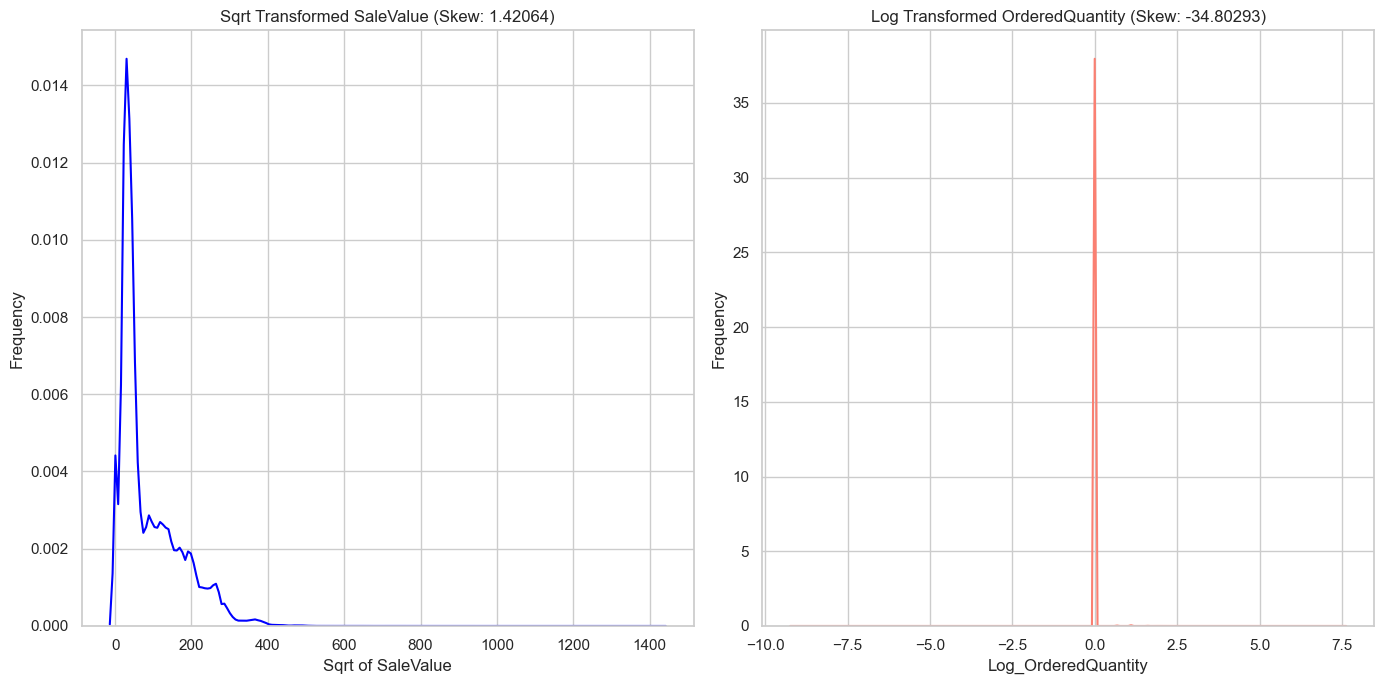

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
# Sqrt Transformed SaleValue
sns.kdeplot(df['Sqrt_SaleValue'], ax=ax[0], color='blue')
ax[0].set_title('Sqrt Transformed SaleValue (Skew: 1.42064)')
ax[0].set_xlabel('Sqrt of SaleValue')
ax[0].set_ylabel('Frequency')

# Log Transformed OrderedQuantity
sns.kdeplot(df['Log_OrderedQuantity'], ax=ax[1], color='salmon')
ax[1].set_title('Log Transformed OrderedQuantity (Skew: -34.80293)')
ax[1].set_xlabel('Log_OrderedQuantity')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
# Dropped columns which are of No use.
df.drop(columns=['Log_SaleValue','Sqrt_OrderedQuantity'], inplace=True)

In [25]:
# Converting the Data-Types of Respective Columns according to their values
df['MerchClassDescription'] = df['MerchClassDescription'].astype('category')
df['MerchGroupDescription'] = df['MerchGroupDescription'].astype('category')
df['ItemDesc'] = df['ItemDesc'].astype('category')
df['MerchCategoryDescription'] = df['MerchCategoryDescription'].astype('category')
df['CustID'] = df['CustID'].astype('category')
df['OrderDate'] = df['OrderDate'].astype('datetime64[ns]')
df['SalesChannelCode'] = df['SalesChannelCode'].astype('category')
df['Ecom_BnM_Indicator'] = df['Ecom_BnM_Indicator'].astype('category')
df['StoreCode'] = df['StoreCode'].astype('category')
df['StoreCity'] = df['StoreCity'].astype('category')
df['StoreState'] = df['StoreState'].astype('category')
df['StorePincode'] = df['StorePincode'].astype('category')

In [26]:
# Checking for all the changes that have been performed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603692 entries, 0 to 1625392
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   CustID                    1603692 non-null  category      
 1   ItemDesc                  1603692 non-null  category      
 2   MerchCategoryDescription  1603692 non-null  category      
 3   MerchClassDescription     1603692 non-null  category      
 4   MerchGroupDescription     1603692 non-null  category      
 5   SaleValue                 1603683 non-null  float64       
 6   OrderedQuantity           1603692 non-null  float64       
 7   OrderDate                 1603692 non-null  datetime64[ns]
 8   SalesChannelCode          1603692 non-null  category      
 9   Ecom_BnM_Indicator        1603692 non-null  category      
 10  StoreID                   1603673 non-null  float64       
 11  StoreCode                 1603689 non-null  category   

**Now converting the above cleaned dataset into new CSV file**

In [28]:
df.to_csv('Cleaned_Customer_Transaction_Data.csv', index=False)

**Details Regarding the data:-**

**Delivery Data:** Details of shipments including invoice number, timestamps of each process from packing to delivery, etc.

In [29]:
# Loading CSV file into DataFrame
df_dd = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/wetransfer_campaign_data-csv_2024-04-13_0433/Customer_Delivery_Data.csv")

In [30]:
df_dd.head()

,orderdate,articletype,originalreqdeliverydate,currentstatus,currentstatustimestamp,sale_timestamp,readytopick_timestamp,readytoship_timestamp,packed_timestamp,connecttocarrier_timestamp,...,outfordelivery_timestamp,delivered_timestamp,articlename,merchcategorydescription,merchclassdescription,merchgroupdescription,itemdesc,shiptozipcode,shiptocity,shiptostate
0,2022-11-15,ZPLU,21-11-2022 00:00,Order Delivered,17-11-2022 19:00,15-11-2022 18:39,15-11-2022 20:53,16-11-2022 08:15,16-11-2022 08:23,16-11-2022 08:24,...,17-11-2022 19:00,17-11-2022 19:00,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,Tablets & Detachables - D,Tablets & Detachables,Computers Peripherals,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,226010.0,LUCKNOW,Uttar Pradesh
1,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,19-11-2022 13:28,16-11-2022 17:30,16-11-2022 18:25,16-11-2022 19:34,16-11-2022 20:51,16-11-2022 20:51,...,19-11-2022 11:44,19-11-2022 13:28,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,Refrigerator Frost Free <300L,Refrigerators,Large Appliances,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,389350.0,HALOL,Gujarat
2,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,21-11-2022 17:34,16-11-2022 17:59,16-11-2022 19:51,16-11-2022 23:41,17-11-2022 01:54,17-11-2022 01:54,...,21-11-2022 13:13,21-11-2022 17:34,BOAT 2.1Ch Soundbar Aavante 1550 RTL,Sound Bars_H,Home Theatre,Entertainment,BOAT 2.1Ch Soundbar Aavante 1550 RTL,493221.0,RAIPUR,Chhattisgarh
3,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,18-11-2022 15:24,16-11-2022 22:22,17-11-2022 02:22,17-11-2022 03:40,17-11-2022 05:10,17-11-2022 05:10,...,18-11-2022 12:53,18-11-2022 15:24,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,250001.0,MEERUT,Uttar Pradesh
4,2022-11-16,ZPLU,16-11-2022 00:00,Order Delivered,17-11-2022 18:36,16-11-2022 22:14,16-11-2022 23:20,16-11-2022 23:45,17-11-2022 07:48,17-11-2022 07:48,...,17-11-2022 08:58,17-11-2022 18:36,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,711102.0,HOWRAH,West Bengal


In [31]:
# Checking for the Columns, Count and Data-types in the table
df_dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232536 entries, 0 to 232535
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   orderdate                      232536 non-null  object 
 1   articletype                    232536 non-null  object 
 2   originalreqdeliverydate        227834 non-null  object 
 3   currentstatus                  232536 non-null  object 
 4   currentstatustimestamp         232536 non-null  object 
 5   sale_timestamp                 69007 non-null   object 
 6   readytopick_timestamp          52446 non-null   object 
 7   readytoship_timestamp          50458 non-null   object 
 8   packed_timestamp               51825 non-null   object 
 9   connecttocarrier_timestamp     51554 non-null   object 
 10  handedovertocarrier_timestamp  51390 non-null   object 
 11  deliveryinprogress_timestamp   50589 non-null   object 
 12  outfordelivery_timestamp      

In [32]:
# Getting the Number of NULL values in the dataset
df_dd.isnull().sum()

orderdate                             0
articletype                           0
originalreqdeliverydate            4702
currentstatus                         0
currentstatustimestamp                0
sale_timestamp                   163529
readytopick_timestamp            180090
readytoship_timestamp            182078
packed_timestamp                 180711
connecttocarrier_timestamp       180982
handedovertocarrier_timestamp    181146
deliveryinprogress_timestamp     181947
outfordelivery_timestamp         180921
delivered_timestamp                   0
articlename                       16574
merchcategorydescription          12481
merchclassdescription             12481
merchgroupdescription             12481
itemdesc                          12181
shiptozipcode                     12207
shiptocity                        12491
shiptostate                       12503
dtype: int64

In [33]:
# Getting the percentage of NaN values
nan_percentiles_Delivery_Data = []
for col in df_dd.columns:
    nan_percentage = df_dd[col].isnull().mean() * 100
    nan_percentiles_Delivery_Data.append((col, nan_percentage))
    
nan_percentiles_Delivery_Data.sort(key=lambda x: x[1], reverse=True)

print("Percentile of NaN values in each column:")
for col, nan_percentage in nan_percentiles_Delivery_Data:
    print(f"{col}: {nan_percentage:.2f}%")

Percentile of NaN values in each column:
readytoship_timestamp: 78.30%
deliveryinprogress_timestamp: 78.24%
handedovertocarrier_timestamp: 77.90%
connecttocarrier_timestamp: 77.83%
outfordelivery_timestamp: 77.80%
packed_timestamp: 77.71%
readytopick_timestamp: 77.45%
sale_timestamp: 70.32%
articlename: 7.13%
shiptostate: 5.38%
shiptocity: 5.37%
merchcategorydescription: 5.37%
merchclassdescription: 5.37%
merchgroupdescription: 5.37%
shiptozipcode: 5.25%
itemdesc: 5.24%
originalreqdeliverydate: 2.02%
orderdate: 0.00%
articletype: 0.00%
currentstatus: 0.00%
currentstatustimestamp: 0.00%
delivered_timestamp: 0.00%


In [34]:
columns_to_drop=['readytoship_timestamp','deliveryinprogress_timestamp','readytopick_timestamp','handedovertocarrier_timestamp',
                 'connecttocarrier_timestamp','outfordelivery_timestamp','packed_timestamp']
df_dd=df_dd.drop(columns=columns_to_drop)

Dropping the above columns since the percentage of NaN values is more then 75% which is not useful for our analysis.

In [35]:
NaN_Value_columns = ['articlename','shiptocity','originalreqdeliverydate',
                    'merchcategorydescription','merchclassdescription','merchgroupdescription']
df_dd = df_dd.dropna(subset=NaN_Value_columns)

Dropped the NaN values from 'articlename','shiptocity','originalreqdeliverydate','merchcategorydescription','merchclassdescription','merchgroupdescription' because the percentage of NaN values is very less which won't affect our analysis.

In [36]:
date_columns = ['orderdate', 'originalreqdeliverydate', 'currentstatustimestamp', 'sale_timestamp','delivered_timestamp']
df_dd[date_columns] = df_dd[date_columns].apply(pd.to_datetime)

Converted the Data-Types of the above columns into datatime format

In [37]:
# Converting the Data-Types of Respective Columns
df_dd['articletype'] = df_dd['articletype'].astype('category')
df_dd['currentstatus'] = df_dd['currentstatus'].astype('category')
df_dd['articlename'] = df_dd['articlename'].astype('category')
df_dd['merchcategorydescription'] = df_dd['merchcategorydescription'].astype('category')          
df_dd['merchclassdescription'] = df_dd['merchclassdescription'].astype('category')                  
df_dd['merchgroupdescription'] = df_dd['merchgroupdescription'].astype('category')                  
df_dd['itemdesc'] = df_dd['itemdesc'].astype('category')
df_dd['shiptocity'] = df_dd['shiptocity'].astype('category')
df_dd['shiptostate'] = df_dd['shiptostate'].astype('category')

In [38]:
df_dd['sale_timestamp'] = df_dd.apply(
    lambda row: row['orderdate'] if pd.isnull(row['sale_timestamp']) else row['sale_timestamp'], axis=1)

**The above step will ensure that the NULL values in the 'sale_timestamp' is been filled with the dates same as 'orderdate' because both of them shares the same dates**

In [39]:
df_dd['sale_timestamp'].isnull().sum()

0

Now trying the Forward and Backward filling Technique to handle NaN values in 'shiptostate' column

In [40]:
df_dd = df_dd.sort_values(by='shiptozipcode')

# Forward filling NaN values in shiptostate column based on shiptozipcode column
df_dd['shiptostate'] = df_dd.groupby('shiptozipcode')['shiptostate'].fillna(method='ffill')

# Backward filling remaining NaN values in shiptostate column based on shiptozipcode column
df_dd['shiptostate'] = df_dd.groupby('shiptozipcode')['shiptostate'].fillna(method='bfill')

In [41]:
nan_percentiles_Delivery_Data = []
for col in df_dd.columns:
    nan_percentage = df_dd[col].isnull().mean() * 100
    nan_percentiles_Delivery_Data.append((col, nan_percentage))
    
nan_percentiles_Delivery_Data.sort(key=lambda x: x[1], reverse=True)

print("Percentile of NaN values in each column:")
for col, nan_percentage in nan_percentiles_Delivery_Data:
    print(f"{col}: {nan_percentage:.2f}%")

Percentile of NaN values in each column:
shiptozipcode: 0.01%
shiptostate: 0.01%
orderdate: 0.00%
articletype: 0.00%
originalreqdeliverydate: 0.00%
currentstatus: 0.00%
currentstatustimestamp: 0.00%
sale_timestamp: 0.00%
delivered_timestamp: 0.00%
articlename: 0.00%
merchcategorydescription: 0.00%
merchclassdescription: 0.00%
merchgroupdescription: 0.00%
itemdesc: 0.00%
shiptocity: 0.00%


In [42]:
# Since the percentile of NaN value has not changed significantly after doing Forward and Backward filling method 
# so now droping the NaN values.
coll = ['shiptozipcode','shiptostate']
df_dd = df_dd.dropna(subset=coll)

In [43]:
df_dd.isnull().sum()

orderdate                   0
articletype                 0
originalreqdeliverydate     0
currentstatus               0
currentstatustimestamp      0
sale_timestamp              0
delivered_timestamp         0
articlename                 0
merchcategorydescription    0
merchclassdescription       0
merchgroupdescription       0
itemdesc                    0
shiptozipcode               0
shiptocity                  0
shiptostate                 0
dtype: int64

**From the above step it is clear that there are NO NULL values in our dataset**

**Now converting the above cleaned dataset into new CSV file**

In [44]:
df_dd.to_csv('Cleaned_Customer_Delivery_Data.csv', index=False)

**Details regarding the data:-**

**Customer Master File:** This table contains the customer details available for each Customer ID – like DOB, Gender, Marital Status, Address Pincode, etc.

In [45]:
# Loading CSV file into DataFrame
df_md = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/wetransfer_campaign_data-csv_2024-04-13_0433/Customer_Master_Data.csv")

In [46]:
# Checking for the Columns, Count and Data-types in the table
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502121 entries, 0 to 502120
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CustID          502121 non-null  object
 1   Gender          364467 non-null  object
 2   Marital_Status  67995 non-null   object
 3   Pincode         492249 non-null  object
 4   State           492181 non-null  object
dtypes: object(5)
memory usage: 19.2+ MB


In [47]:
df_md.head()

,CustID,Gender,Marital_Status,Pincode,State
0,7teAttAeH,NaN,NaN,678506.0,Keral
1,7t8tJJHt7,NaN,NaN,770001.0,Odisha
2,787t17tJt,NaN,NaN,245101.0,Uttar Pradesh
3,787ttJtHH,NaN,NaN,673008.0,Keral
4,7878HHoHo,NaN,NaN,501510.0,Telangana


In [48]:
# Getting the Number of NULL values in the dataset
df_md.isnull().sum()

CustID                 0
Gender            137654
Marital_Status    434126
Pincode             9872
State               9940
dtype: int64

In [49]:
# Getting the percentage of NaN values
Nan_percentiles = []
for col in df_md.columns:
    nan_percentage = df_md[col].isnull().mean() * 100
    Nan_percentiles.append((col, nan_percentage))
    
Nan_percentiles.sort(key=lambda x: x[1], reverse=True)

print("Percentile of NaN values in each column:")
for col, nan_percentage in Nan_percentiles:
    print(f"{col}: {nan_percentage:.2f}%")

Percentile of NaN values in each column:
Marital_Status: 86.46%
Gender: 27.41%
State: 1.98%
Pincode: 1.97%
CustID: 0.00%


**Now we will treat the columns with higher NaN percentile and also the columns with extremely lower NaN percentile.**

In [50]:
df_md.drop(columns=['Marital_Status'], inplace=True)

Dropping the column "Marital_Status" since the percentage of NaN values is 86.46% which is not useful for our analysis.


In [51]:
Nan_columns = ['State', 'Pincode']
df_md = df_md.dropna(subset=Nan_columns)

Dropped the NaN values from 'State', 'Pincode' because the percentage of NaN values is less then 3% (Standard Value)

In [52]:
# Replacing blank spaces with 'DEFAULT' for the Gender Column since the percentage of NaN values is 27.41% which cannot be dropped.
df_md['Gender'] = df_md['Gender'].fillna('DEFAULT')

In [53]:
# Getting the percentage of NaN values
Nan_percentiles = []
for col in df_md.columns:
    nan_percentage = df_md[col].isnull().mean() * 100
    Nan_percentiles.append((col, nan_percentage))
    
Nan_percentiles.sort(key=lambda x: x[1], reverse=True)

print("Percentile of NaN values in each column:")
for col, nan_percentage in Nan_percentiles:
    print(f"{col}: {nan_percentage:.2f}%")

Percentile of NaN values in each column:
CustID: 0.00%
Gender: 0.00%
Pincode: 0.00%
State: 0.00%


**From the above step it is clear that there are NO NULL values in our dataset**

In [54]:
df_md.to_csv('Cleaned_Customer_Master_Data.csv', index=False)

In [79]:
df_fd = pd.read_csv('C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/filtered_data.csv')

In [80]:
df_fd.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Log_OrderedQuantity,Sqrt_SaleValue,Month,Year,Segment
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,25398.0001,1.0001,2019-01-01,RS,B&M,83.0,A129,Pune,Maharashtra,411014,0.0001,159.367500,1,2019,Mainstream
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,193703.1001,1.0001,2019-01-01,RS,B&M,83.0,A129,Pune,Maharashtra,411014,0.0001,440.117144,1,2019,Premium
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.9801,1.0001,2019-01-01,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001,0.0001,162.846492,1,2019,Mainstream
3,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,1120.9801,1.0001,2019-01-01,RS,B&M,8.0,A010,Surat,Gujarat,395007,0.0001,33.481041,1,2019,Value
4,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,Gaming Laptops,Computers Peripherals,66085.8001,1.0001,2019-01-01,RS,B&M,24.0,A032,New Delhi,Delhi NCR,110007,0.0001,257.071586,1,2019,Mainstream


In [81]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453108 entries, 0 to 453107
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CustID                    453108 non-null  object 
 1   ItemDesc                  453108 non-null  object 
 2   MerchCategoryDescription  453108 non-null  object 
 3   MerchClassDescription     453108 non-null  object 
 4   MerchGroupDescription     453108 non-null  object 
 5   SaleValue                 453107 non-null  float64
 6   OrderedQuantity           453108 non-null  float64
 7   OrderDate                 453108 non-null  object 
 8   SalesChannelCode          453108 non-null  object 
 9   Ecom_BnM_Indicator        453108 non-null  object 
 10  StoreID                   453100 non-null  float64
 11  StoreCode                 453107 non-null  object 
 12  StoreCity                 453108 non-null  object 
 13  StoreState                453108 non-null  o

In [82]:
df_fd.isna().sum()

CustID                      0
ItemDesc                    0
MerchCategoryDescription    0
MerchClassDescription       0
MerchGroupDescription       0
SaleValue                   1
OrderedQuantity             0
OrderDate                   0
SalesChannelCode            0
Ecom_BnM_Indicator          0
StoreID                     8
StoreCode                   1
StoreCity                   0
StoreState                  0
StorePincode                0
Log_OrderedQuantity         0
Sqrt_SaleValue              1
Month                       0
Year                        0
Segment                     1
dtype: int64

In [83]:
Col_to_drop = ['ItemDesc','MerchCategoryDescription','MerchClassDescription','MerchGroupDescription','SalesChannelCode',
              'Ecom_BnM_Indicator','StoreID','StoreCode','StoreCity','StoreState','StorePincode','Log_OrderedQuantity','Sqrt_SaleValue',]

df_fd = df_fd.drop(columns=Col_to_drop)

In [84]:
df_fd.head()

,CustID,SaleValue,OrderedQuantity,OrderDate,Month,Year,Segment
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,25398.0001,1.0001,2019-01-01,1,2019,Mainstream
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,193703.1001,1.0001,2019-01-01,1,2019,Premium
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,26518.9801,1.0001,2019-01-01,1,2019,Mainstream
3,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,1120.9801,1.0001,2019-01-01,1,2019,Value
4,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,66085.8001,1.0001,2019-01-01,1,2019,Mainstream


In [87]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453108 entries, 0 to 453107
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CustID           453108 non-null  category      
 1   SaleValue        453107 non-null  float64       
 2   OrderedQuantity  453108 non-null  float64       
 3   OrderDate        453108 non-null  datetime64[ns]
 4   Month            453108 non-null  int64         
 5   Year             453108 non-null  int64         
 6   Segment          453107 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(2)
memory usage: 24.9 MB


In [86]:
df_fd['CustID'] = df_fd['CustID'].astype('category')
df_fd['OrderDate'] = df_fd['OrderDate'].astype('datetime64[ns]')
df_fd['Segment'] = df_fd['Segment'].astype('category')

In [89]:
df_fd.to_csv('Cleaned_Customer_Filtered_Data.csv', index=False)